In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Import files 

In [2]:
import implementations, function, helpers

from implementations import *
from function import *
from helpers import *

Import the data on the same folder and load it.

In [3]:
data_path_tr = "train.csv"
data_path_te = "test.csv"

# load data.
y_tr, x_tr, ids_tr = load_csv_data(data_path_tr, sub_sample=False)
y_te, x_te, ids_te = load_csv_data(data_path_te, sub_sample=False)

## Plot data

In [27]:
from function import *

names = ["DER_mass_MMC", "DER_mass_transverse_met_lep", "DER_mass_vis", "DER_pt_h", "DER_deltaeta_jet_jet", "DER_mass_jet_jet", "DER_prodeta_jet_jet", "DER_deltar_tau_lep", "DER_pt_tot", "DER_sum_pt", "DER_pt_ratio_lep_tau", "DER_met_phi_centrality", "DER_lep_eta_centrality", "PRI_tau_pt", "PRI_tau_eta", "PRI_tau_phi", "PRI_lep_pt", "PRI_lep_eta", "PRI_lep_phi", "PRI_met", "PRI_met_phi", "PRI_met_sumet", "PRI_jet_num", "PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi", "PRI_jet_subleading_pt", "PRI_jet_subleading_eta", "PRI_jet_subleading_phi", "PRI_jet_all_pt"]

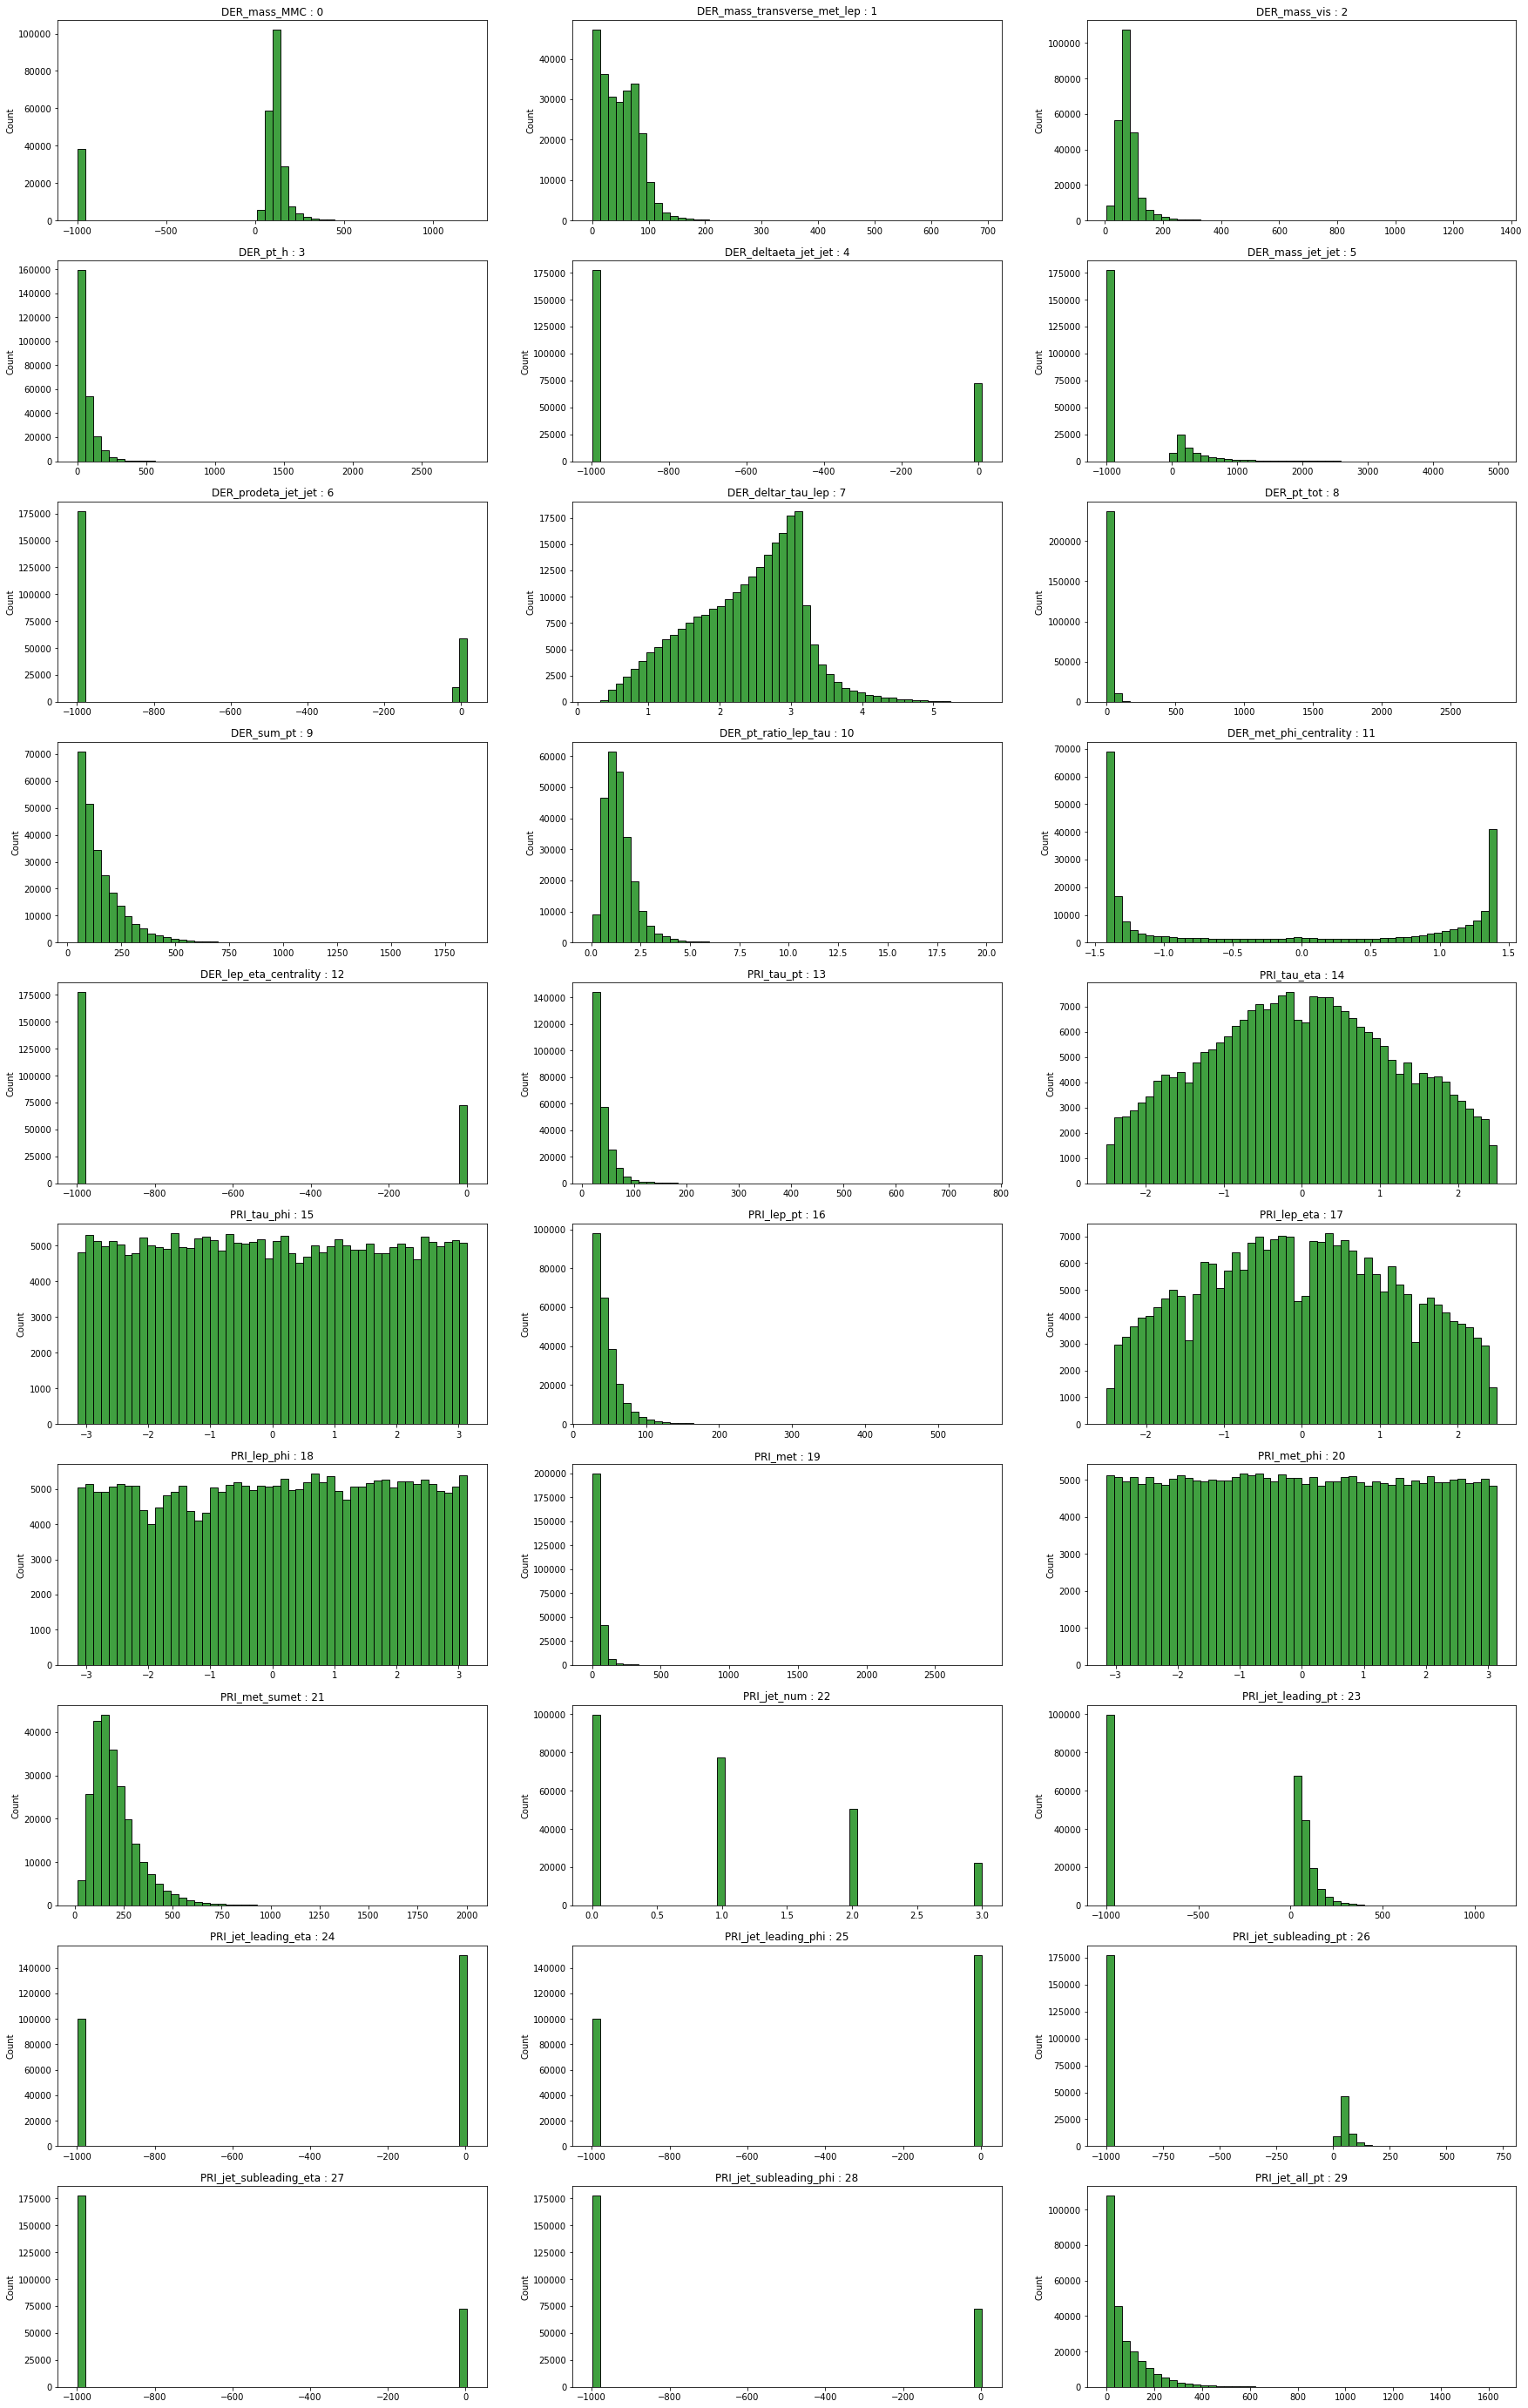

1

In [28]:
plot_features(x_tr, names)

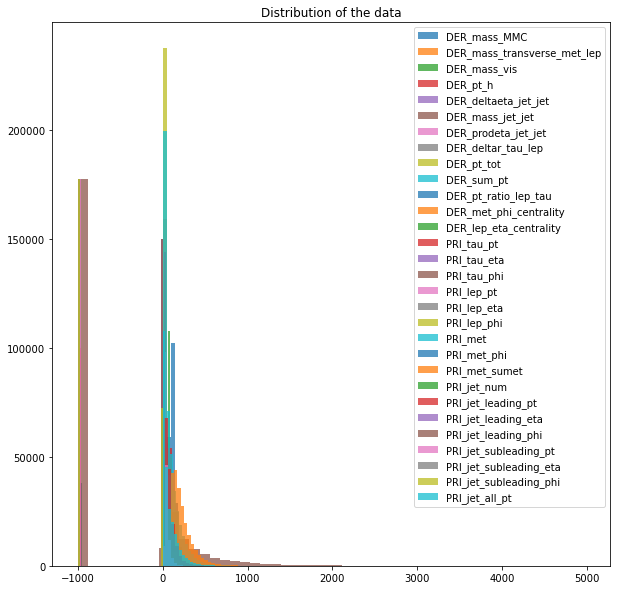

In [29]:
plt.figure(figsize=(10, 10))
for i in range(len(names)):
    plt.hist(x_tr[:,i], bins=50, alpha=0.75, label = names[i])
    plt.legend(fontsize=10)
    plt.title("Distribution of the data")

# Remove -999.

Compare when we detect the boson and when not.

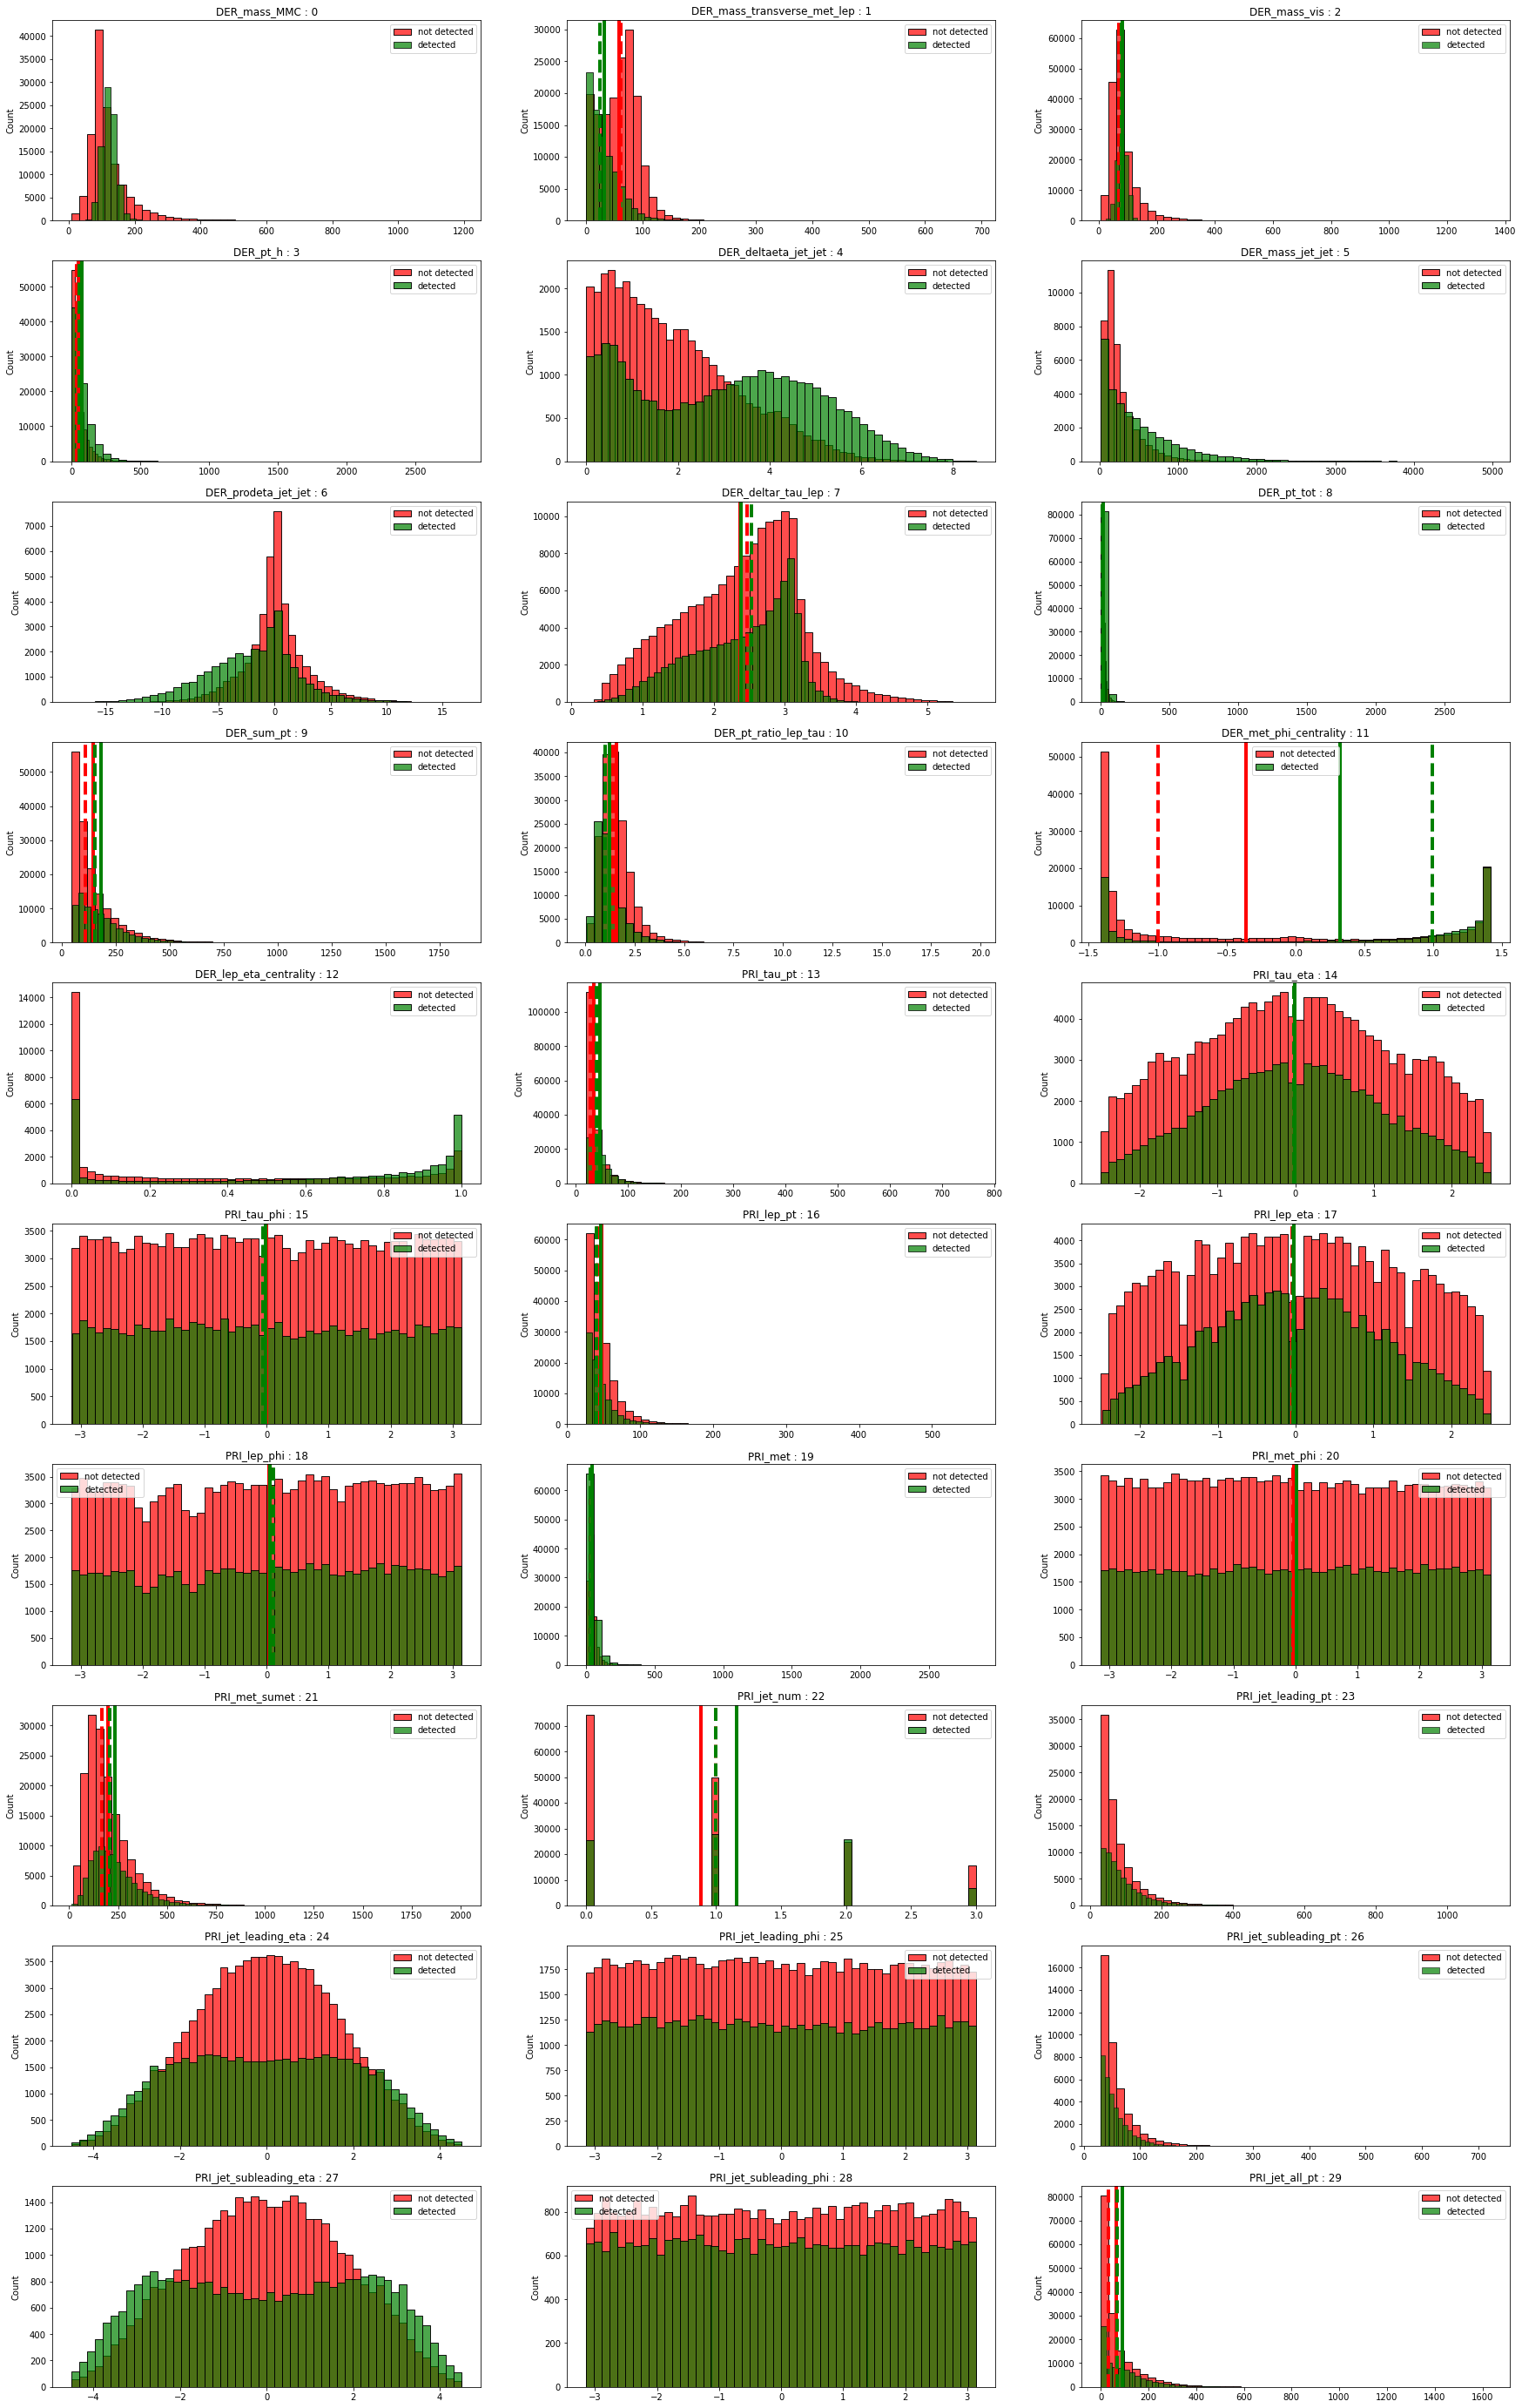

1

In [30]:
plot_detected_features(put_nan(x_tr), y_tr, names)

We should separate the data depending on the PRI_jet_num to gain information.

# Standardize data

We need to replace the missing data with smart values

### 1. Separate continuous and discrete data 

In [4]:
x_tr_class = x_tr[:, 22]
#remove the column 22 with discrete values
x_tr_reg = np.delete(x_tr, 22, axis=1)

x_te_class = x_te[:, 22]
x_te_reg = np.delete(x_te, 22, axis=1)

### 2. Replace missing values by median 

In [5]:
from function import *
# Not standardize but value of nan replace 
x_tr_reg = replace_nan_by_median(x_tr_reg)
x_te_reg = replace_nan_by_median(x_te_reg)

### 3. Split the data according to PRI_jet_num

In [6]:
#split the data according to PRI_jet_num
x_tr_split = np.array([x_tr_reg[np.where(x_tr_class==0)], x_tr_reg[np.where(x_tr_class==1)], 
                       x_tr_reg[np.where(x_tr_class==2)], x_tr_reg[np.where(x_tr_class==3)]], dtype=object)

y_tr_split = np.array([y_tr[np.where(x_tr_class==0)], y_tr[np.where(x_tr_class==1)], 
                       y_tr[np.where(x_tr_class==2)], y_tr[np.where(x_tr_class==3)]], dtype=object)

x_te_split = np.array([x_te_reg[np.where(x_te_class==0)], x_te_reg[np.where(x_te_class==1)], 
                       x_te_reg[np.where(x_te_class==2)], x_te_reg[np.where(x_te_class==3)]], dtype=object)

y_te_split = np.array([y_te[np.where(x_te_class==0)], y_te[np.where(x_te_class==1)], 
                       y_te[np.where(x_te_class==2)], y_te[np.where(x_te_class==3)]], dtype=object)


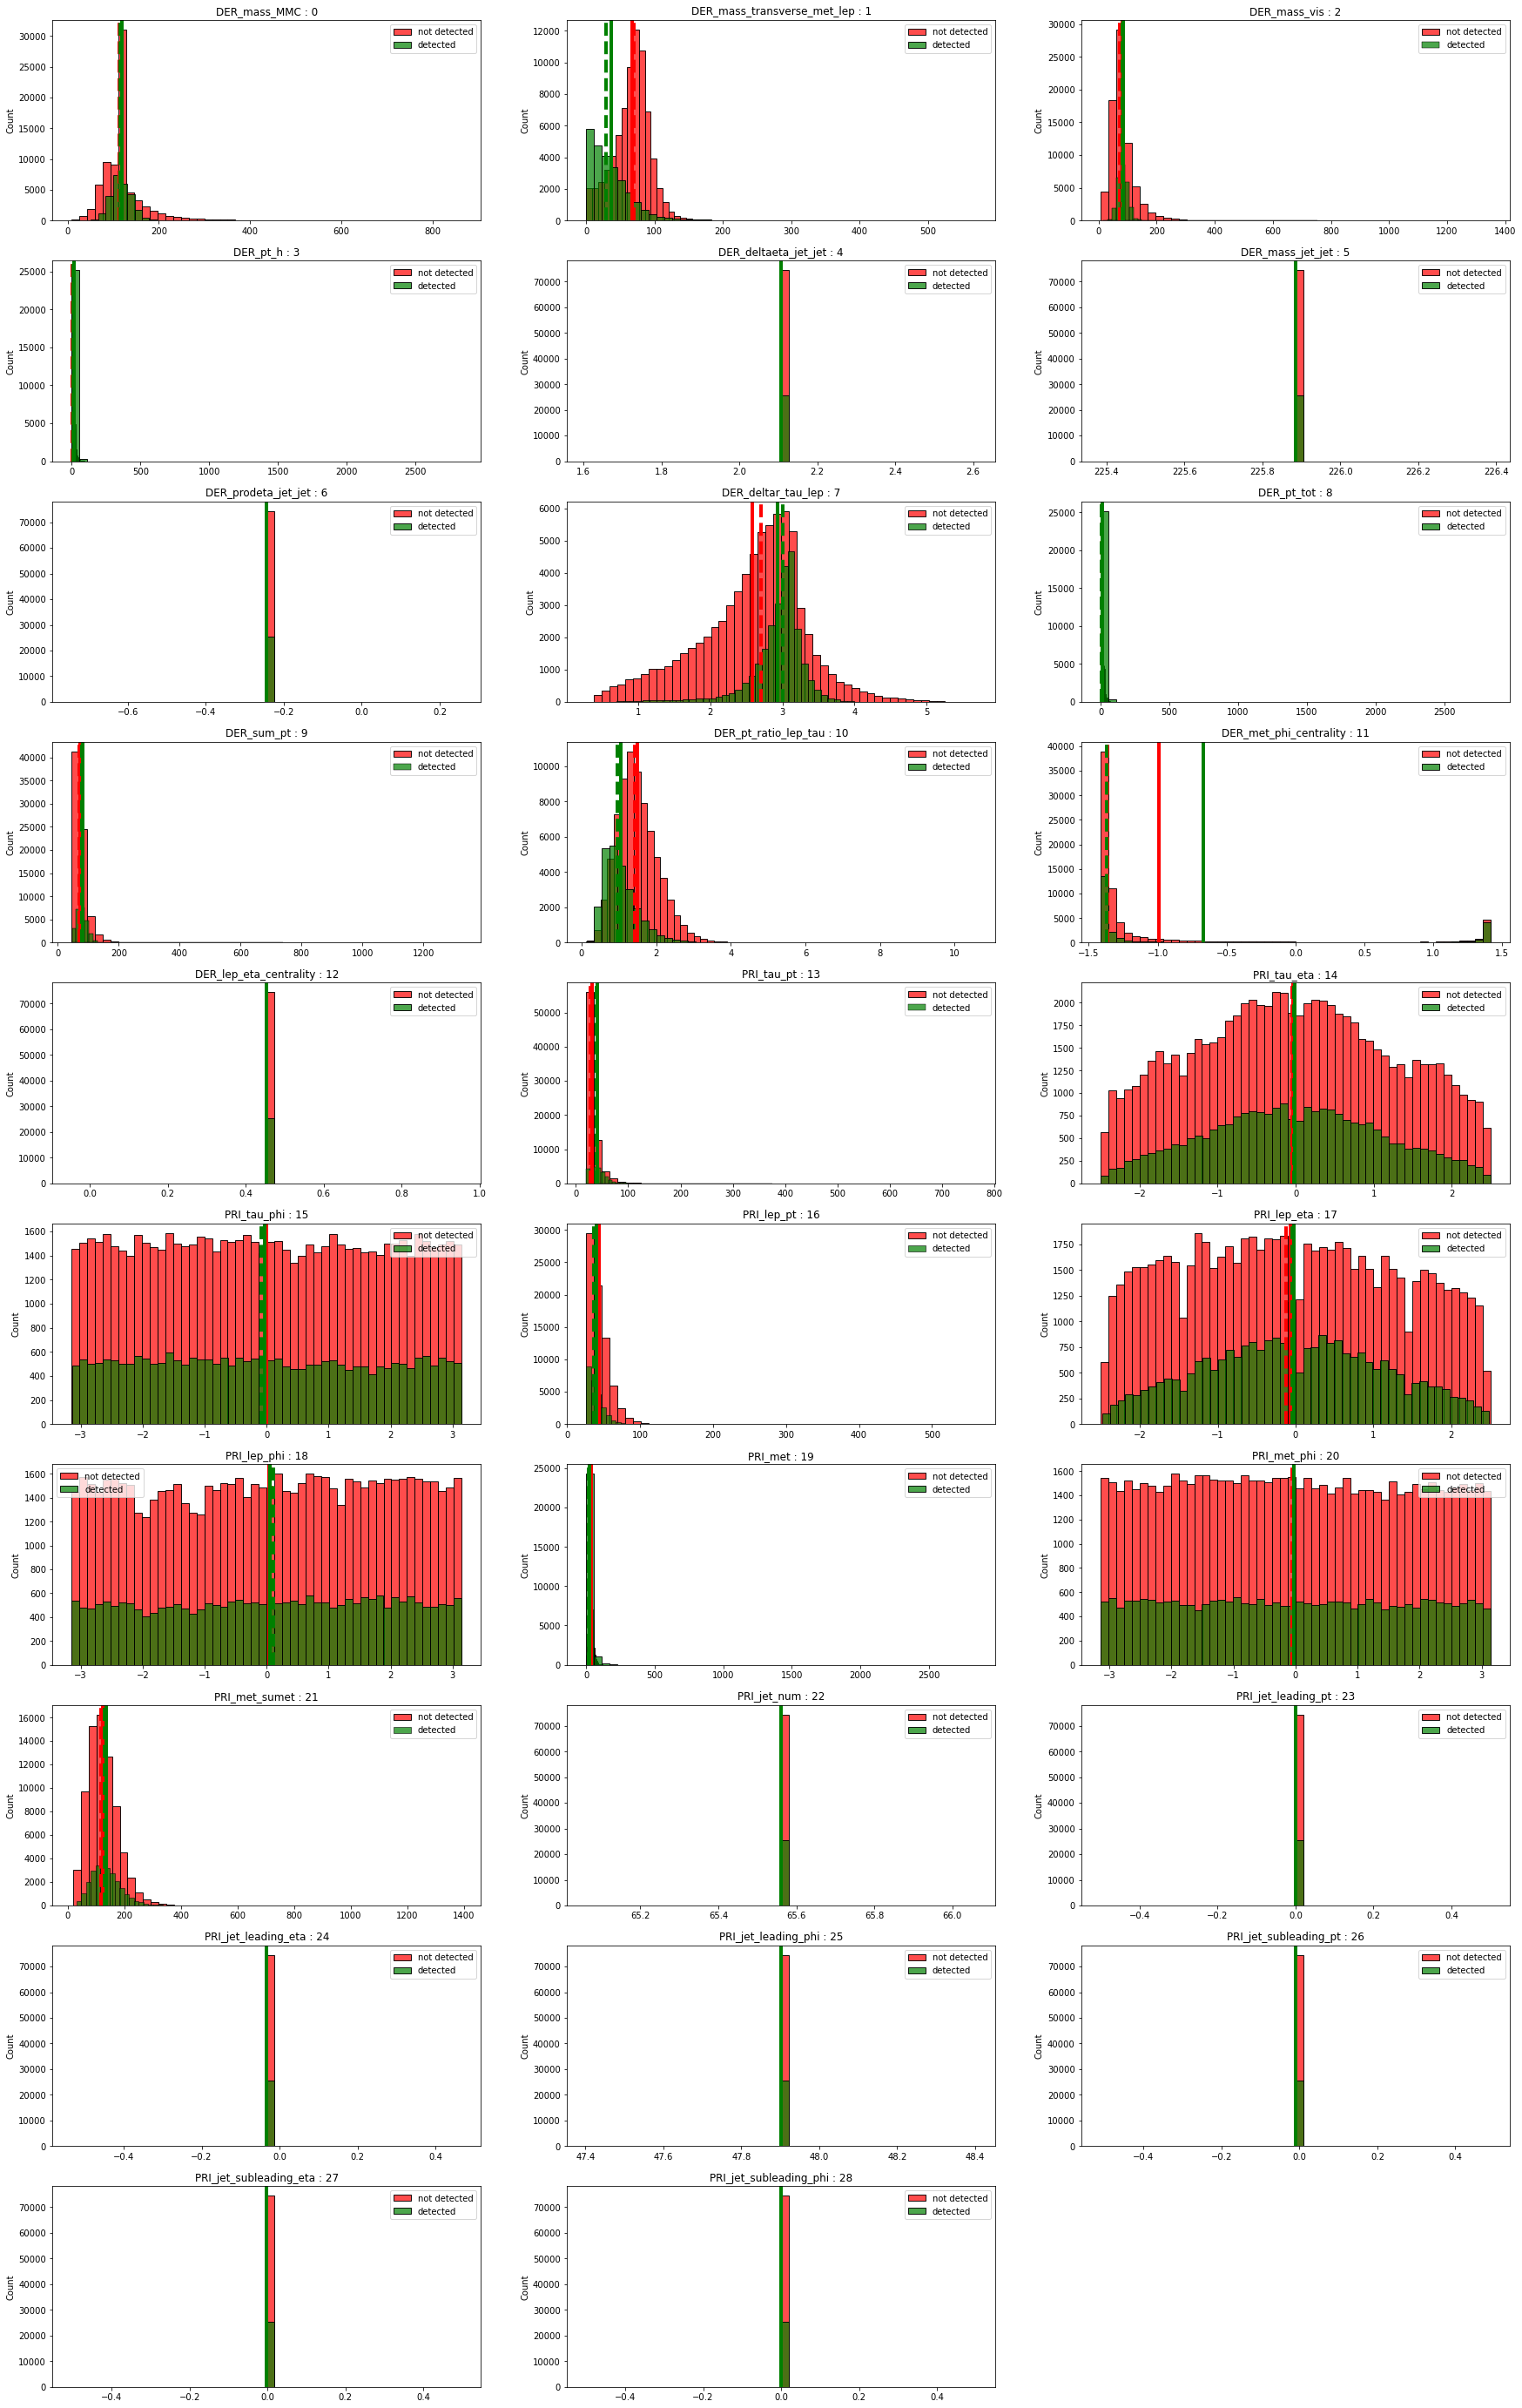

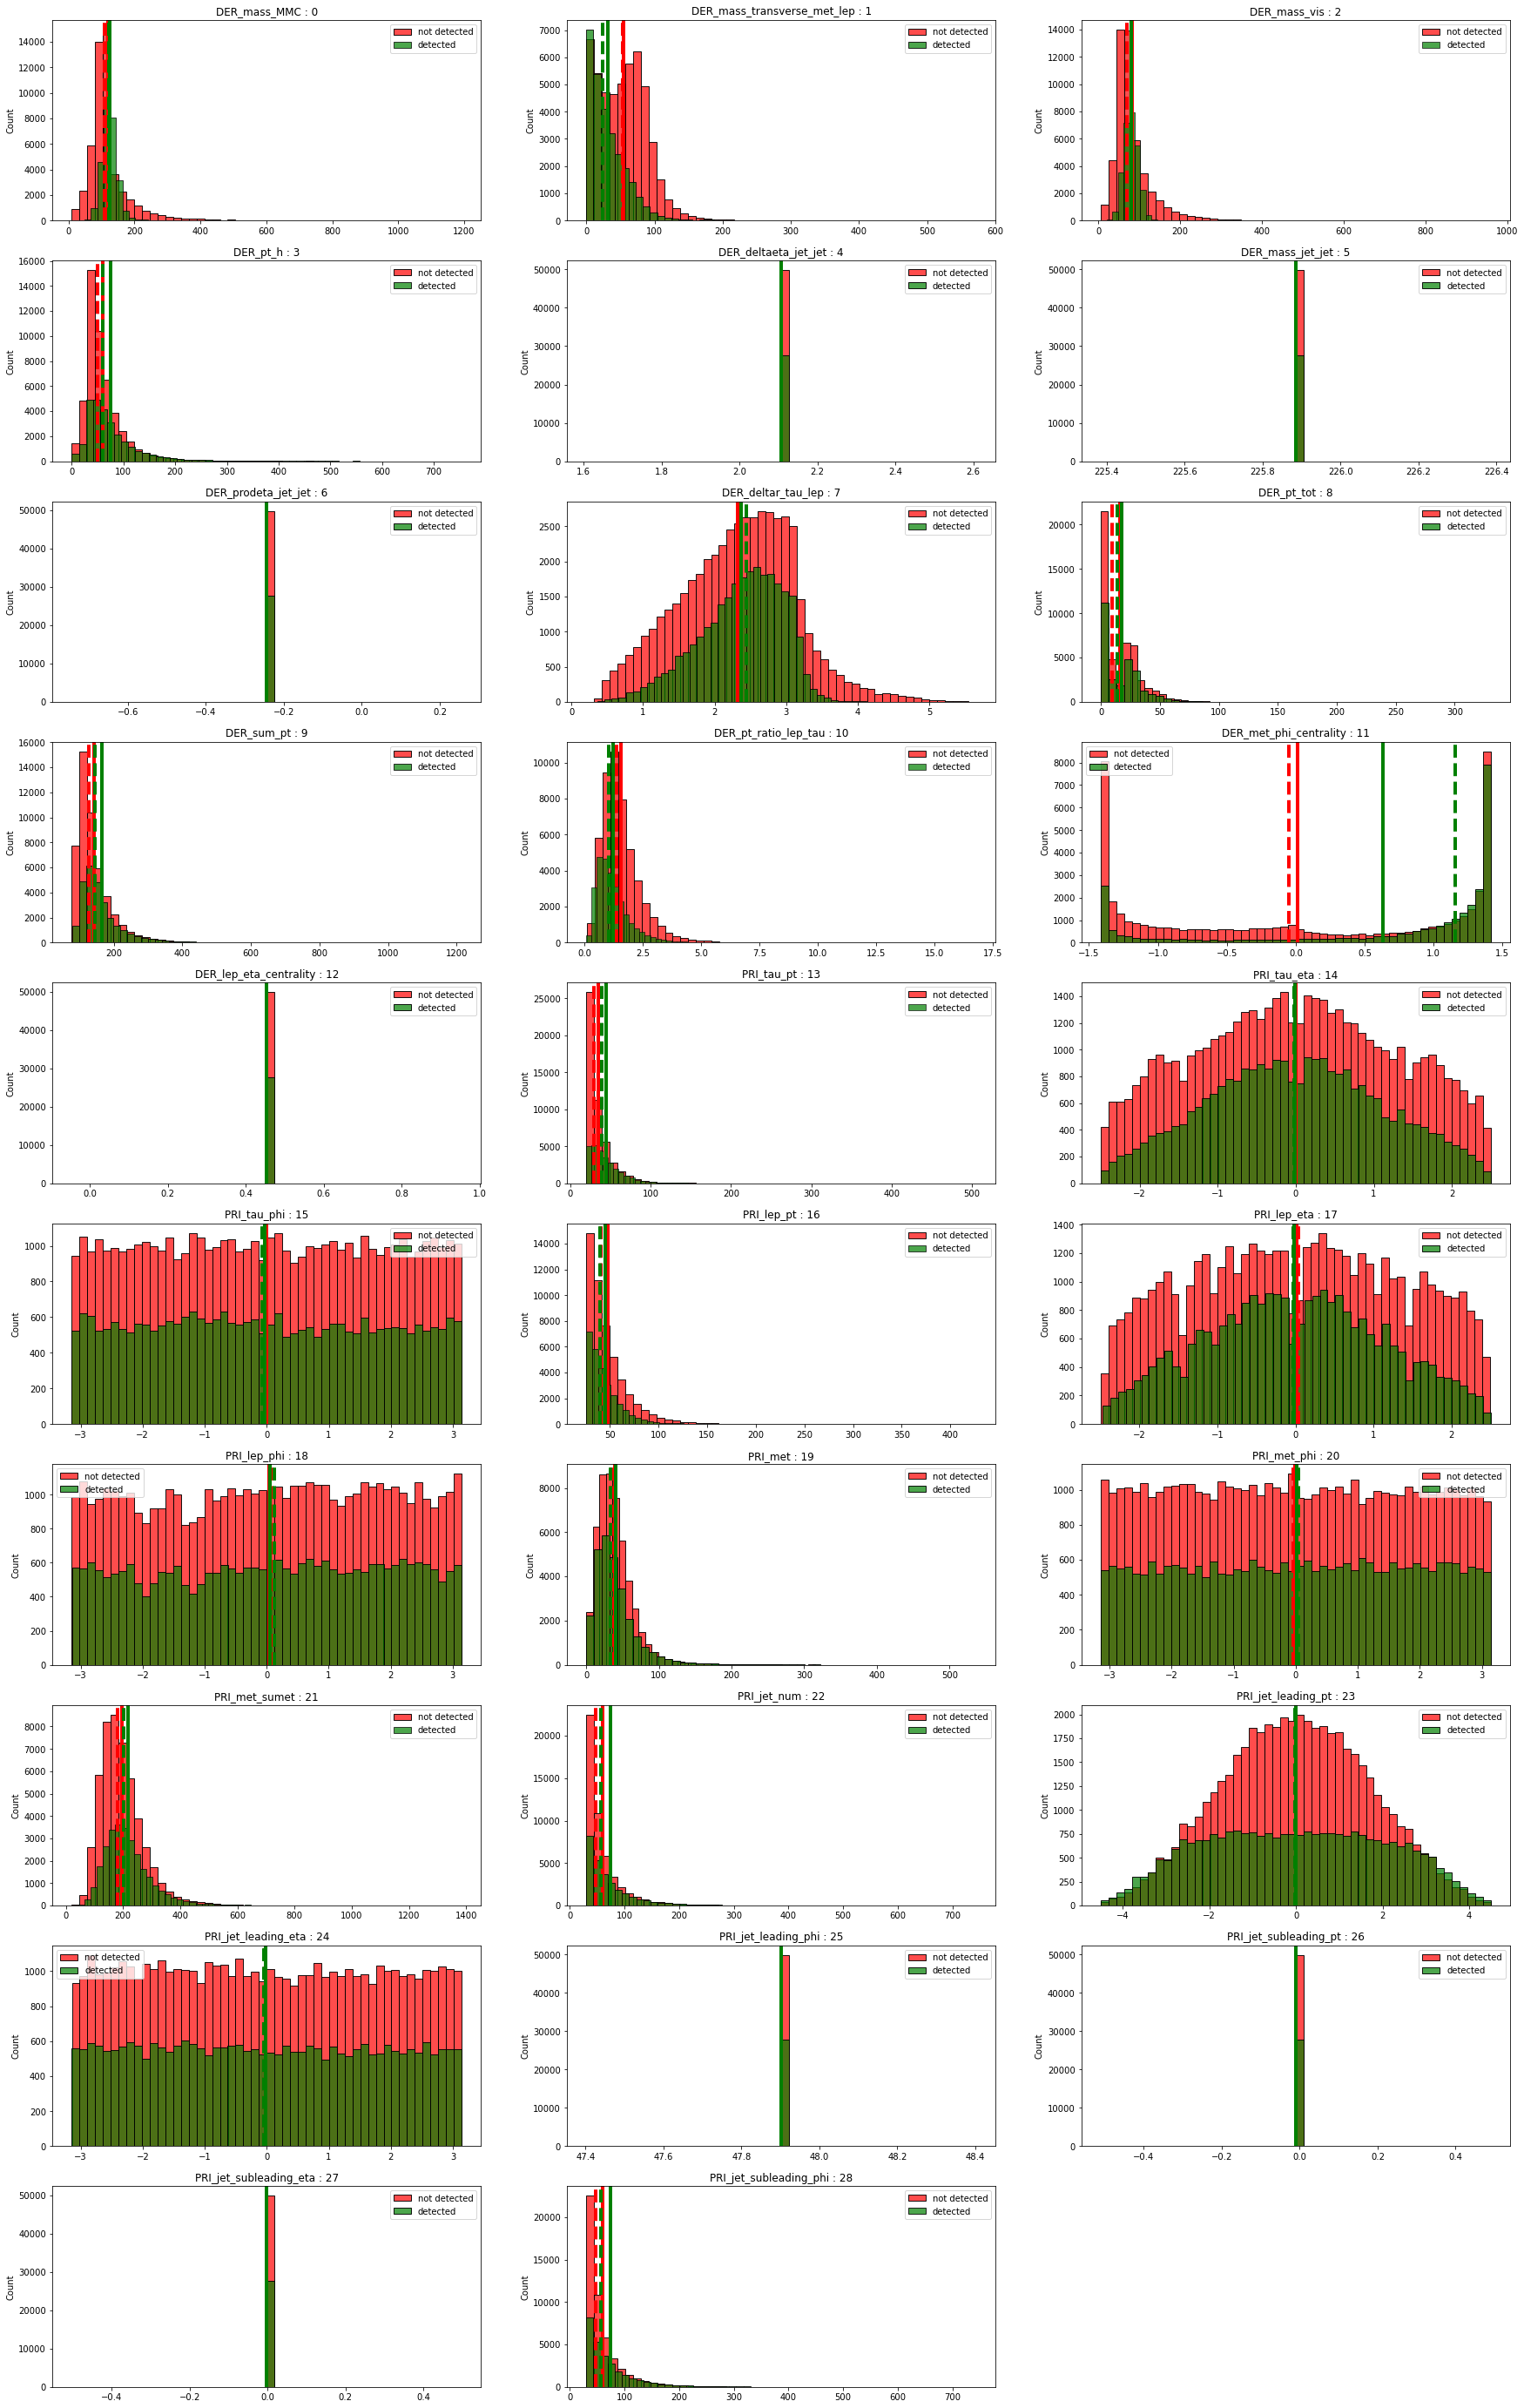

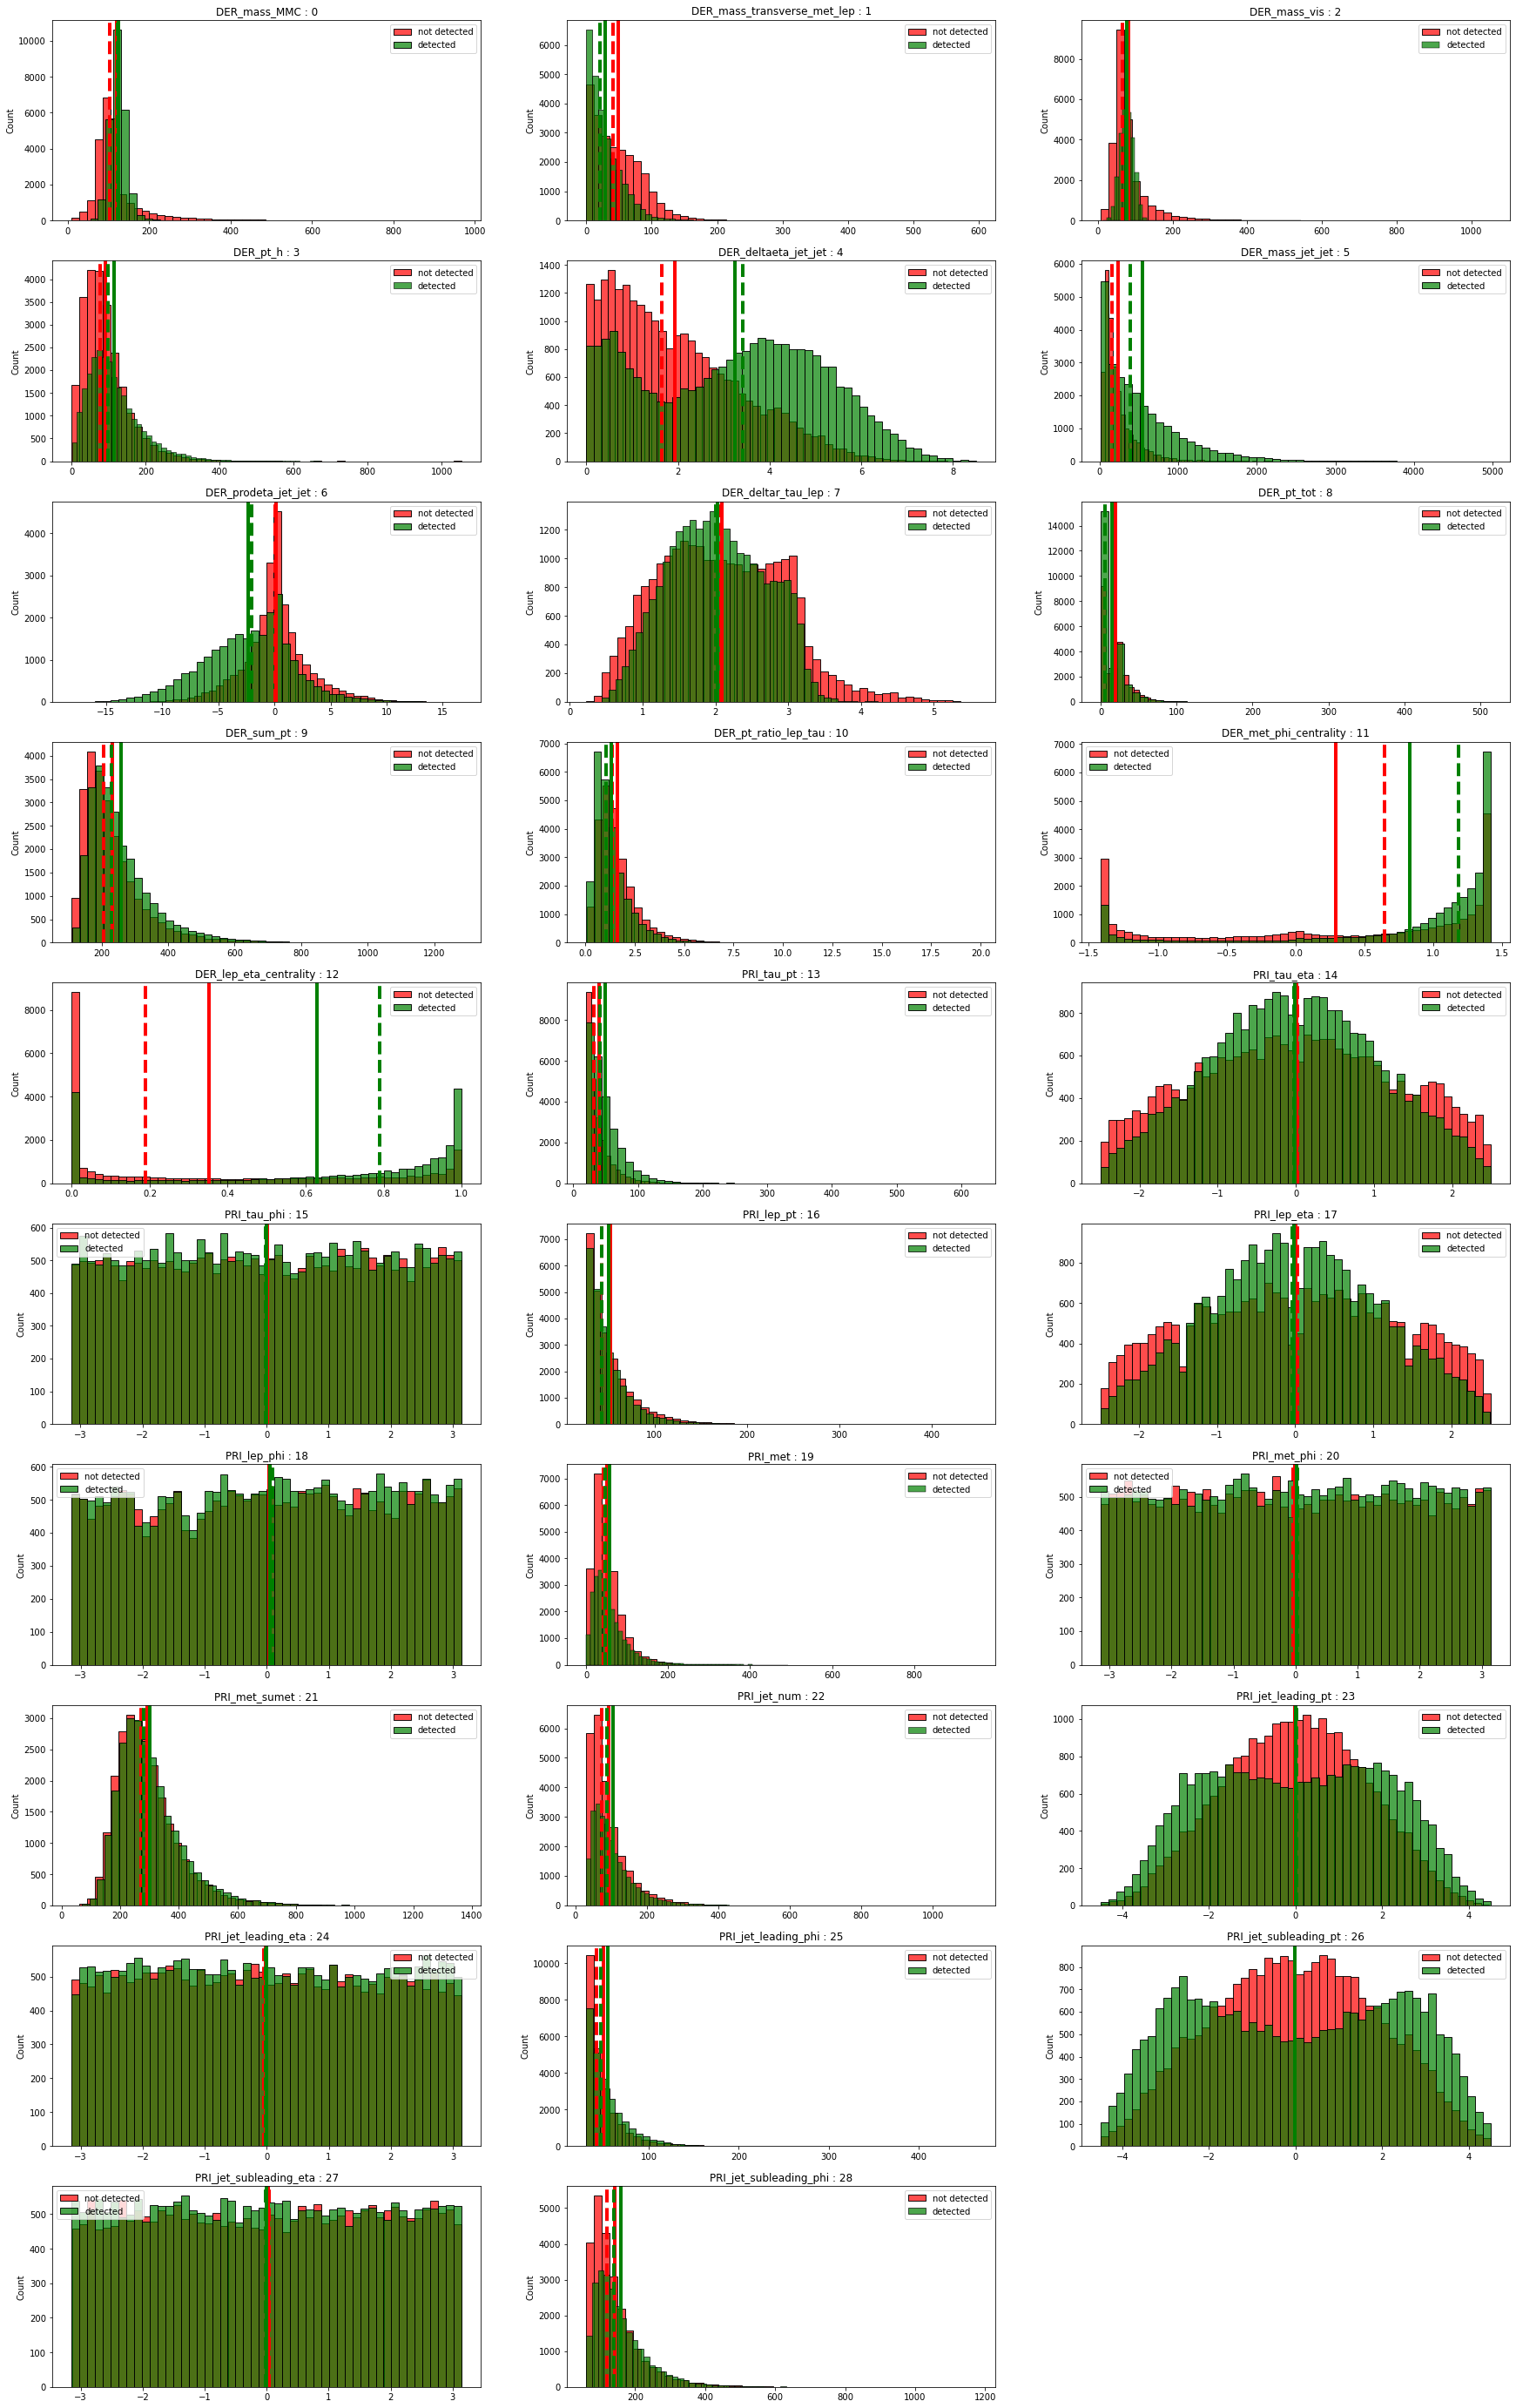

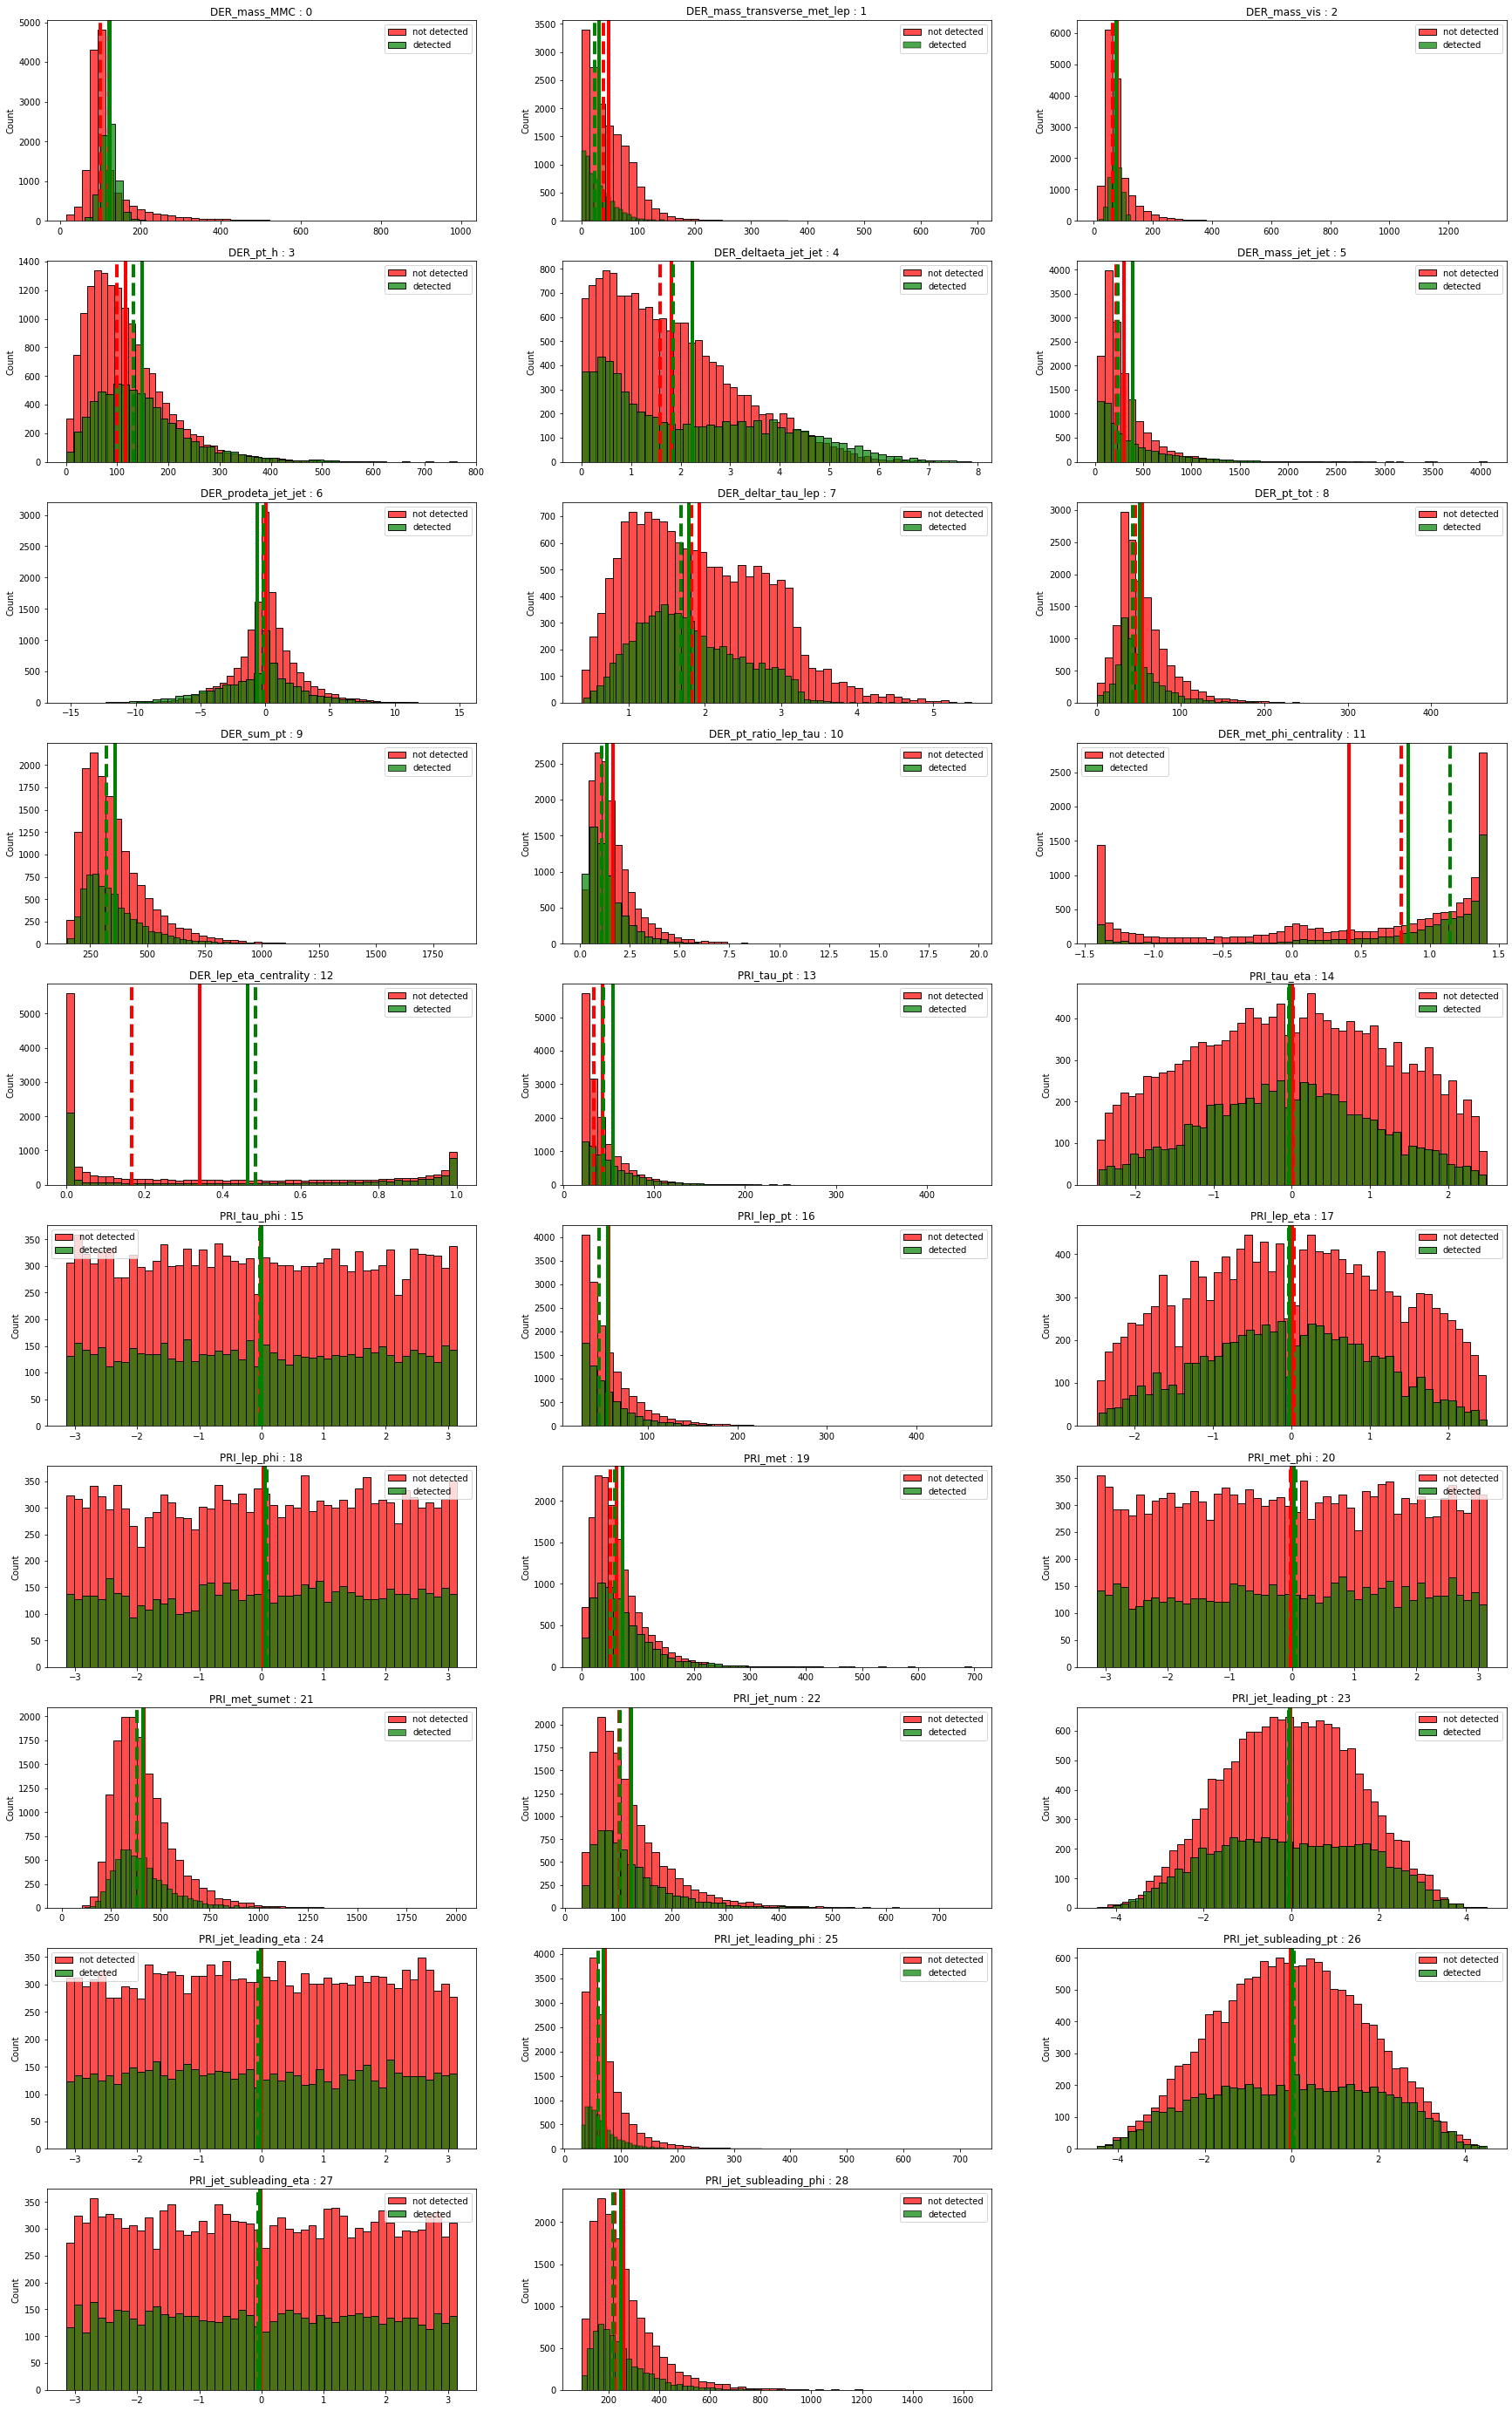

In [31]:
for i in range(len(x_tr_split)):
    plot_detected_features(x_tr_split[i], y_tr_split[i], names)

- For the split 0 we observe : columns 4, 5, 6, 8, 12 and 22 to 28 are useless.  
- For the split 1 we observe : columns 4, 5, 6, 12 and 25 to 27 are useless.  
- For the split 2 and 3 we can keep all the data.  


### 4. Remove useless data

In [7]:
x_tr_del = [np.delete(x_tr_split[0], [4, 5, 6, 8, 12, 22, 23, 24, 25, 26, 27, 28], axis=1),
            np.delete(x_tr_split[1], [4, 5, 6, 12, 25, 26, 27], axis=1), 
            x_tr_split[2], x_tr_split[3]]

In [8]:
x_te_del = [np.delete(x_te_split[0], [4, 5, 6, 8, 12, 22, 23, 24, 25, 26, 27, 28], axis=1),
            np.delete(x_te_split[1], [4, 5, 6, 12, 25, 26, 27], axis=1), 
            x_te_split[2], x_te_split[3]]

### 5. Split train and test

In [ ]:
ratio_test = 0.2
seed = 10

#split train and test sets
y_tr_tr_0, y_tr_te_0, x_tr_tr_0, x_tr_te_0 = train_test_split(y_tr_split[0], x_tr_del[0], ratio_test, seed)
y_tr_tr_1, y_tr_te_1, x_tr_tr_1, x_tr_te_1 = train_test_split(y_tr_split[1], x_tr_del[1], ratio_test, seed)
y_tr_tr_2, y_tr_te_2, x_tr_tr_2, x_tr_te_2 = train_test_split(y_tr_split[2], x_tr_del[2], ratio_test, seed)
y_tr_tr_3, y_tr_te_3, x_tr_tr_3, x_tr_te_3 = train_test_split(y_tr_split[3], x_tr_del[3], ratio_test, seed)

### 6.0 Feature Expension and standardization

In [ ]:
x_tr_list=[x_tr_tr_0, x_tr_tr_1, x_tr_tr_2, x_tr_tr_3]
x_te_list=[x_tr_te_0, x_tr_te_1, x_tr_te_2, x_tr_te_3]
y_tr_list=[y_tr_tr_0, y_tr_tr_1, y_tr_tr_2, y_tr_tr_3]
y_te_list=[y_tr_te_0, y_tr_te_1, y_tr_te_2, y_tr_te_3]

In [ ]:
degree = 6

x_tr_tr_poly = []
x_tr_te_poly = []
for i in range(x_tr_split.shape[0]):
    x_tr_tr_poly.append(standardize(build_poly(x_tr_list[i], degree)))
    x_tr_te_poly.append(standardize(build_poly(x_te_list[i], degree)))
    #keep one's on the first column
    x_tr_tr_poly[i][:,0]=np.ones(x_tr_tr_poly[i][:,0].shape[0])
    x_tr_te_poly[i][:,0]=np.ones(x_tr_te_poly[i][:,0].shape[0])


### 7.0 Manual tests

In [ ]:
from implementations import *

# Define the parameters of the algorithm.
lambda_tab = [0, 0, 0, 0] #regularization terms

max_iters_tab = [3500, 3500, 3500, 3500]
gamma_tab = [10**(-1), 1, 10**(-1), 5*10**(-1)]  #learing rate

for i in range(x_tr_split.shape[0]) :  
    print("DATA_SET : ", i)
    #w_init = params_history[-1][i]
    w_init = np.full(x_tr_tr_poly[i].shape[1], 0.1)
    w, losses = reg_logistic_regression(y_tr_list[i], x_tr_tr_poly[i], lambda_tab[i], w_init, max_iters_tab[i], gamma_tab[i])
    
    loss_tr = compute_loss(y_tr_list[i], x_tr_tr_poly[i], w[-1], 'negative_log_likelihood')
    loss_te = compute_loss(y_te_list[i], x_tr_te_poly[i], w[-1], 'negative_log_likelihood')
    
    print("loss_tr : ", loss_tr)
    print("loss_te : ", loss_te)
    

Our strategy is to test several values as follow :      
- We increase gamma while the train loss converge faster and faster to a minima. When the loss starts to increse, or even to diverge we stop the increasing of gamma. 
- When we remark overfitting i.e. test loss biger than train loss, we reduce the number of iteration or/and we increase lambda.
- We take the polynomial degree with the best test loss on average.
After playing with different regularization terms and different learning rates, we observe the following : 

**With polynomial degree of 3 :**    

- data_set_0 : minimum loss test achievable is 0.37
- data_set_1 : minimum loss test achievable is 0.46 
- data_set_2 : minimum loss test achievable is 0.45
- data_set_3 : minimum loss test achievable is 0.46

**With polynomial degree of 4 :**    

- data_set_0 : minimum loss test achievable is 0.37
- data_set_1 : minimum loss test achievable is 0.46
- data_set_2 : minimum loss test achievable is 0.45
- data_set_3 : minimum loss test achievable is 0.46

**With polynomial degree of 5 :**    

- data_set_0 : minimum loss test achievable is 0.37
- data_set_1 : minimum loss test achievable is 0.46
- data_set_2 : minimum loss test achievable is 0.45
- data_set_3 : minimum loss test achievable is 0.46

**With polynomial degree of 6 :**    
- data_set_0 : minimum loss test achievable is 0.37
- data_set_1 : minimum loss test achievable is 0.44
- data_set_2 : minimum loss test achievable is 0.44
- data_set_3 : minimum loss test achievable is 0.44

**With polynomial degree of 8 :**    
- data_set_0 : minimum loss test achievable is 0.37
- data_set_1 : minimum loss test achievable is 0.44
- data_set_2 : minimum loss test achievable is 0.45
- data_set_3 : minimum loss test achievable is 0.44

**With polynomial degree of 10 :**    
- data_set_0 : minimum loss test achievable is 0.37
- data_set_1 : minimum loss test achievable is 0.44
- data_set_2 : minimum loss test achievable is 0.44
- data_set_3 : minimum loss test achievable is 0.44


**Conclusion**
All these results were find with the same max_iter parameter : 3500.

All the dataset with polynomial degree between 3 and 6 led to very similar results. With polynomial expansion larger than 6, we had to train longer the dataset. After plotting the test_loss vs the train_loss, we remarked that polynomial expansion of degree 10 did not led to overfitting when one might have expected it. So we could train it for very long epochs (here we didn't had time and power to do so).    

Note that the plots of the test_loss vs the train_loss are not shown here since it is not allowed in the submission to modify reg_logistic_regression and to make it return arrays of weights and losses.

For computational power purposes we didn't pushed the polynomial feature expansion over degree 10.


In [16]:
#parameters leading to the best score on AICrowd
best_degree = 6
best_lambda = [10**(-4), 0, 10**(-4), 0]
best_max_iter = [15000, 15000, 15000, 15000]
best_gamma = [0.1, 1, 0.1, 0.2]

### 6.1 Feature Expension and standardization with the whole dataset

In [17]:
degree = best_degree

x_tr_poly = []
x_te_poly = []
for i in range(len(x_tr_del)):
    x_tr_poly.append(standardize(build_poly(x_tr_del[i], degree)))
    x_te_poly.append(standardize(build_poly(x_te_del[i], degree)))
    #keep one's on the first column
    x_tr_poly[i][:,0]=np.ones(x_tr_poly[i][:,0].shape[0])
    x_te_poly[i][:,0]=np.ones(x_te_poly[i][:,0].shape[0])

### 7.1 Train on the whole dataset

In [26]:
from implementations import *
# Define the parameters of the algorithm.
lambda_tab = best_lambda
max_iters_tab = best_max_iter
gamma_tab = best_gamma #learing rate

#w_tab=np.zeros((4, x_tr_tr_poly[0].shape[1]))
#losses_tab=np.array((0,4))
w_tab = []

for i in range(x_tr_split.shape[0]) :  
    print("DATA_SET : ", i)
    #w_init = params_history[-1][i]
    w_init = np.full(x_tr_poly[i].shape[1], 0.1)
    w, losses = reg_logistic_regression(y_tr_split[i], x_tr_poly[i], lambda_tab[i], w_init, max_iters_tab[i], gamma_tab[i])
    w_tab.append(w)
    

DATA_SET :  0
iteration :  0  , loss :  0.9262512205404542
iteration :  100  , loss :  0.10190653998916616
iteration :  200  , loss :  0.05198318770039813
iteration :  300  , loss :  0.03459724603879107
iteration :  400  , loss :  0.0258567914881919
iteration :  500  , loss :  0.020617929319238847
iteration :  600  , loss :  0.017133979711607263
iteration :  700  , loss :  0.014652118657747308
iteration :  800  , loss :  0.012795467703728166
iteration :  900  , loss :  0.011354763367411353
iteration :  1000  , loss :  0.010204610730193301
iteration :  1100  , loss :  0.009265341534091885
iteration :  1200  , loss :  0.008483934575822208
iteration :  1300  , loss :  0.007823745755921138
iteration :  1400  , loss :  0.007258644164971573
iteration :  1500  , loss :  0.00676949754804427
iteration :  1600  , loss :  0.006341978281394421
iteration :  1700  , loss :  0.005965145435001895
iteration :  1800  , loss :  0.00563050076221194
iteration :  1900  , loss :  0.00533134351595326
iteratio

KeyboardInterrupt: 

In [ ]:
params_history = []
params_history.append(w_tab)
print(loss_tr)
print(loss_te)

# TEST

In [22]:
x_te_id = x_te[:, 22]
ind_0 = np.where(x_te_id==0)[0]
ind_1 = np.where(x_te_id==1)[0]
ind_2 = np.where(x_te_id==2)[0]
ind_3 = np.where(x_te_id==3)[0]

In [23]:
proba=np.zeros(x_te.shape[0])
y_hat=[]

proba[ind_0] = x_te_poly[0]@w_tab[0]
proba[ind_1] = x_te_poly[1]@w_tab[1]
proba[ind_2] = x_te_poly[2]@w_tab[2]
proba[ind_3] = x_te_poly[3]@w_tab[3]

for i in proba:
    if i>0:
        y_hat.append(1)
    else :
        y_hat.append(-1)


We fix the initial values of the parameters, based on running the algorithm several times and noting down the final parameter values. It gives us a better starting point and helps to achieve a better performance in a limited number of iterations.

# Create csv for submission

In [25]:
from helpers import *

create_csv_submission(ids_te, y_hat, 'submissionfinalX1')